### Importing all the Libraries needed in the Wrangling project

In [1]:
import pandas as pd
import numpy as np
import requests
import os

### Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

##### 1. Importing WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from local machine

In [2]:
dog_twitter_archive = pd.read_csv('/Users/user/Desktop/UDACITY_PROJECT/PROJECT GANGAN/Twitter Project/twitter-archive-enhanced.csv')

##### 2. Programmatically Downloading the 'image_predictions' file with the Python Requests Library

In [3]:
#Creating folder Image_predictions
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Using request.get to get the tsv file from Udacity's directory
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
result = requests.get(url)
result

<Response [200]>

In [5]:
#Open a file called image-predictions.tsv, everything after the last slash in the URL using python's .split function
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(result.content)

In [6]:
#Checking the content of our folder
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#Opening the image_prediction tsv file in python using pandas
Image_prediction = pd.read_csv('/Users/user/image_predictions/image-predictions.tsv', sep = '\t')

In [8]:
#Checking the Image_prediction dataframe
Image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

#### 3. Using Twitters API Tweepy to gather each tweet's retweet count and favorite ("like") count 

In [9]:
import json

In [10]:
f = open('/Users/user/Desktop/UDACITY_PROJECT/PROJECT GANGAN/Twitter Project/tweet-json.txt', 'r')
df = f.readlines()

In [11]:
df

['{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"me

In [12]:
with open("/Users/user/Desktop/UDACITY_PROJECT/PROJECT GANGAN/Twitter Project/tweet-json.txt") as f:
    df_twitter_api = pd.DataFrame ((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])
        
#change column names
df_twitter_api.columns = ['tweet_id', 'favourites','retweets']
#Use tweet_id column as index
df_twitter_api.set_index('tweet_id', inplace = True)
#display few lines
df_twitter_api.head()

favourites  retweets
tweet_id                                
892420643555336193       39467      8853
892177421306343426       33819      6514
891815181378084864       25461      4328
891689557279858688       42908      8964
891327558926688256       41048      9774

In [13]:
#Saving df_twitter_api to local machine
df_twitter_api.to_csv('twitter_api.csv', index = True)

In [14]:
#Loading twitter_api back into Jupyter notebook
twitter_api = pd.read_csv('/Users/user/twitter_api.csv')

## Assessing Data



##### Overview of the dataframes

In [15]:
dog_twitter_archive.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [16]:
Image_prediction.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [17]:
twitter_api.head(5)

tweet_id  favourites  retweets
0  892420643555336193       39467      8853
1  892177421306343426       33819      6514
2  891815181378084864       25461      4328
3  891689557279858688       42908      8964
4  891327558926688256       41048      9774

##### Assessing the size of the dataframes

In [18]:
dog_twitter_archive.shape

(2356, 17)

In [19]:
Image_prediction.shape

(2075, 12)

In [20]:
twitter_api.shape

(2354, 3)

##### Checking for null values in the dataframe

In [21]:
#checking for duplicate values in the twitter_archive_enhanced table
dog_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
Image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
twitter_api.isnull().sum()

tweet_id      0
favourites    0
retweets      0
dtype: int64

##### Checking for duplicate values in the dataframes

In [24]:
dog_twitter_archive.duplicated().sum()

0

In [25]:
Image_prediction.duplicated().sum()

0

In [26]:
twitter_api.duplicated().sum()

0

##### Checking the datatypes in the dataframes

In [27]:
dog_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
Image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tweet_id    2354 non-null   int64
 1   favourites  2354 non-null   int64
 2   retweets    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### Checking for the summary statistics in the dataframes

In [30]:
dog_twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [31]:
Image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [32]:
twitter_api.describe()

tweet_id     favourites      retweets
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

##### Checking for unique Dog names

In [33]:
dog_twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

##### Checking the statistics on image prediction

In [34]:
Image_prediction.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [35]:
Image_prediction.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [36]:
Image_prediction.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [37]:
Image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
twitter_api.isnull().sum()

tweet_id      0
favourites    0
retweets      0
dtype: int64

##### Checking for tweet source

In [39]:
dog_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Checking for duplicate columns

In [40]:
all_columns = pd.Series(list(dog_twitter_archive) + list(Image_prediction) + list(twitter_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Check for duplicated rows

In [41]:
dog_twitter_archive.expanded_urls.duplicated().sum()

137

#### Checking dog names

In [42]:
dog_twitter_archive['name'].unique().tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

## Quality Issues
1. Tweet beyond August 1st, 2017 do no have an image prediction and is not relevant to analysis

2. some values in the "rating_numerator" and "rating_denominator" columns in the `dog_twitter_archive file`, are greater or lesser than 10.

3. Erroneous data types in the tweet_id and timestamp columns of the three tables 

4. Tweet source is embedded in the tweet url in the `dog_archive_copy` table

5. Doggo, floofer, pupper, puppo columns in the `dog_archive_copy table` contain "None" as value

6. Error in Dog names, characters such as 'a', 'an', 'the' are included in dog names

7. There rows where the image prediction is not Dog in the `Image_prediction_copy` table

8. There hyphen in dog names in the (p1,p2,p3) columns in image_prediction_copy table 


## Tidiness issues
1. "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns in the twitter_enhanced_csv file are empty
3. The tables containing data on single tweet are contained in separate tables - tables should be appended
2. Source column in `dog_twitter_archive` table has the device tweeters used in the url

In [43]:
Image_prediction.img_num.max()

4

In [44]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tweet_id    2354 non-null   int64
 1   favourites  2354 non-null   int64
 2   retweets    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### Cleaning
Quality "
1. change values greater or lesser than 10 in the "rating_denominator" column of the twitter_enhanced_csv file, are


Tidiness
1. Delete "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns in the twitter_enhanced_csv file 

### CLEANING

##### Make copies of original pieces of data

In [45]:
dog_archive_copy = dog_twitter_archive.copy()

Image_prediction_copy = Image_prediction.copy()

twitter_api_copy = twitter_api.copy()

#### QUALITY ISSUES

##### 1.Define

1. Tweet beyond August 1st, 2017 do no have an image prediction and is not relevant to analysis

##### Code

In [46]:
#gathering the tweets before August 1st, 2017 with image
dog_archive_copy = dog_archive_copy[dog_archive_copy['timestamp'] < "2017-07-01"]

##### Test

In [47]:
dog_archive_copy.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
58  880935762899988482                    NaN                  NaN   
59  880872448815771648                    NaN                  NaN   
60  880465832366813184                    NaN                  NaN   
61  880221127280381952                    NaN                  NaN   
62  880095782870896641                    NaN                  NaN   
63  879862464715927552                    NaN                  NaN   
64  879674319642796034           8.795538e+17         3.105441e+09   
65  879492040517615616                    NaN                  NaN   
66  879415818425184262                    NaN                  NaN   
67  879376492567855104                    NaN                  NaN   

                    timestamp  \
58  2017-06-30 23:47:07 +0000   
59  2017-06-30 19:35:32 +0000   
60  2017-06-29 16:39:47 +0000   
61  2017-06-29 00:27:25 +0000   
62  2017-06-28 16:09:20 +0000   
63  2017-06-28 00:42:13 +0000   
64  2017-06-27 12:14:36 +0000   
65  2017-06-27 00:10:17 +0000   
66  2017-06-26 19:07:24 +0000   
67  2017-06-26 16:31:08 +0000   

                                               source  \
58  <a href="http://twitter.com/download/iphone" r...   
59  <a href="http://twitter.com/download/iphone" r...   
60  <a href="http://twitter.com/download/iphone" r...   
61  <a href="http://twitter.com/download/iphone" r...   
62  <a href="http://twitter.com/download/iphone" r...   
63  <a href="http://twitter.com/download/iphone" r...   
64  <a href="http://twitter.com/download/iphone" r...   
65  <a href="http://twitter.com/download/iphone" r...   
66  <a href="http://twitter.com/download/iphone" r...   
67  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
58  This is Louis. He's crossing. It's a big deal....                  NaN   
59  Ugh not again. We only rate dogs. Please don't...                  NaN   
60  This is Bella. She had her first beach experie...                  NaN   
61  Meet Jesse. He's a Fetty Woof. His tongue ejec...                  NaN   
62  Please don't send in photos without dogs in th...                  NaN   
63  This is Romeo. He would like to do an entrance...                  NaN   
64                    @RealKentMurphy 14/10 confirmed                  NaN   
65  This is Bailey. He thinks you should measure e...                  NaN   
66  This is Duddles. He did an attempt. 13/10 some...                  NaN   
67  This is Jack AKA Stephen Furry. You're not sco...                  NaN   

    retweeted_status_user_id retweeted_status_timestamp  \
58                       NaN                        NaN   
59                       NaN                        NaN   
60                       NaN                        NaN   
61                       NaN                        NaN   
62                       NaN                        NaN   
63                       NaN                        NaN   
64                       NaN                        NaN   
65                       NaN                        NaN   
66                       NaN                        NaN   
67                       NaN                        NaN   

                                        expanded_urls  rating_numerator  \
58  https://twitter.com/dog_rates/status/880935762...                13   
59  https://twitter.com/dog_rates/status/880872448...                12   
60  https://twitter.com/dog_rates/status/880465832...                12   
61  https://twitter.com/dog_rates/status/880221127...                12   
62  https://twitter.com/dog_rates/status/880095782...                11   
63  https://twitter.com/dog_rates/status/879862464...                13   
64                                                NaN                14   
65  https://twitter.com/dog_rates/status/879492040...                12   
66  https://twitter.com/dog_rates/status/879415818...              

##### 2.Define
2. some values in the "rating_denominator" columns in the `dog_twitter_archive file`, are greater or lesser than 10.

i. Delete outliers in the `rating_numerator` column lesser than

ii. Change all values not equal to 10 in the `rating_denominator` column

##### Code

In [48]:
#checking for where rating denominator is lesser than 10
dog_twitter_archive[dog_twitter_archive["rating_numerator"] < 10 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    NaN                  NaN   
229   848212111729840128                    NaN                  NaN   
315   835152434251116546                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
462   817502432452313088                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
229   2017-04-01 16:35:01 +0000   
315   2017-02-24 15:40:31 +0000   
387   2017-02-01 01:11:25 +0000   
462   2017-01-06 22:45:43 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
45    <a href="http://twitter.com/download/iphone" r...   
229   <a href="http://twitter.com/download/iphone" r...   
315   <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   
462   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
45    This is Bella. She hopes her smile made you sm...                  NaN   
229   This is Jerry. He's doing a distinguished tong...                  NaN   
315   When you're so blinded by your systematic plag...                  NaN   
387   I was going to do 007/10, but the joke wasn't ...                  NaN   
462   RT @dog_rates: Meet Herschel. He's slightly bi...         6.924173e+17   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
45                         NaN                        NaN   
229                        NaN                        NaN   
315                        NaN                        NaN   
387                        NaN                        NaN   
462               4.196984e+09  2016-01-27 18:42:06 +0000   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
45    https://twitter.com/dog_rates/status/883482846...                 5   
229   https://twitter.com/dog_rates/status/848212111...                 6   
315   https://twitter.com/dog_rates/status/835152434...                 0   
387                

In [49]:
#checking for where rating denominator isn't equal to 10
dog_twitter_archive[dog_twitter_archive["rating_denominator"] != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [50]:
#checking for where rating denominator is lesser than 10
dog_archive_copy.query("rating_numerator < 10")['tweet_id'].count()

439

##### Test

In [51]:
dog_archive_copy[dog_archive_copy['rating_denominator'] != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

##### 3. Define
Erroneous datatypes 

`dog_archive_copy`
>tweet_id to string

>timestamp to datetime datatype

`Image_prediction_copy`
>tweet_id to string

`twitter_api_copy`
>tweet_id to string


##### Code

In [52]:
#Checking for the datatypes
dog_archive_copy.dtypes, Image_prediction_copy.dtypes, twitter_api_copy.dtypes

(tweet_id                        int64
 in_reply_to_status_id         float64
 in_reply_to_user_id           float64
 timestamp                      object
 source                         object
 text                           object
 retweeted_status_id           float64
 retweeted_status_user_id      float64
 retweeted_status_timestamp     object
 expanded_urls                  object
 rating_numerator                int64
 rating_denominator              int64
 name                           object
 doggo                          object
 floofer                        object
 pupper                         object
 puppo                          object
 dtype: object,
 tweet_id      int64
 jpg_url      object
 img_num       int64
 p1           object
 p1_conf     float64
 p1_dog         bool
 p2           object
 p2_conf     float64
 p2_dog         bool
 p3           object
 p3_conf     float64
 p3_dog         bool
 dtype: object,
 tweet_id      int64
 favourites    int64
 retweets  

In [53]:
# Changing the erroneous datatypes for dog_arhives_copy table
dog_archive_copy.tweet_id = dog_archive_copy.tweet_id.astype(str)
dog_archive_copy.timestamp = pd.to_datetime(dog_archive_copy.timestamp)

# Changing the erroneous  datatypes for Image_prediction_copy table
Image_prediction_copy.tweet_id = Image_prediction_copy.tweet_id.astype(str)

# Changing the erroneous datatypes for twitter_api_copy table
twitter_api_copy.tweet_id = twitter_api_copy.tweet_id.astype(str)

##### Test

In [54]:
dog_archive_copy.dtypes, Image_prediction_copy.dtypes, twitter_api_copy.dtypes

(tweet_id                                   object
 in_reply_to_status_id                     float64
 in_reply_to_user_id                       float64
 timestamp                     datetime64[ns, UTC]
 source                                     object
 text                                       object
 retweeted_status_id                       float64
 retweeted_status_user_id                  float64
 retweeted_status_timestamp                 object
 expanded_urls                              object
 rating_numerator                            int64
 rating_denominator                          int64
 name                                       object
 doggo                                      object
 floofer                                    object
 pupper                                     object
 puppo                                      object
 dtype: object,
 tweet_id     object
 jpg_url      object
 img_num       int64
 p1           object
 p1_conf     float64
 p1_dog     

##### 4. Define
1. Tweet source is embedded in the tweet url in the `dog_archive_copy` table
2. Correct tweet source using a split finction

##### Code

In [55]:
# defining function to identify tweet source
def split_source(x):
    return x.split('>', 1)[-1][:-4]
# apply to source column
dog_archive_copy['source'] = dog_archive_copy['source'].apply(split_source)

##### Test

In [56]:
dog_archive_copy['source'].value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

##### 5. Define
1. `Doggo`, `floofer`, `pupper`, `puppo` columns in the `dog_archive_copy` table contain "None" as value
2. Change 'None' into 'Nan' to ease the merging of the cells under Tidiness issue

##### Code

In [57]:
dog_archive_copy.loc[dog_archive_copy['doggo'] == 'None','doggo'] = np.nan
dog_archive_copy.loc[dog_archive_copy['floofer'] == 'None','floofer'] = np.nan
dog_archive_copy.loc[dog_archive_copy['pupper'] == 'None','pupper'] = np.nan
dog_archive_copy.loc[dog_archive_copy['puppo'] == 'None','puppo'] = np.nan

##### Test

In [58]:
dog_archive_copy[['doggo','floofer','pupper', 'puppo']].sample(10)

doggo floofer pupper puppo
232    NaN     NaN    NaN   NaN
2257   NaN     NaN    NaN   NaN
640    NaN     NaN    NaN   NaN
1403   NaN     NaN    NaN   NaN
510    NaN     NaN    NaN   NaN
2337   NaN     NaN    NaN   NaN
2061   NaN     NaN    NaN   NaN
1182   NaN     NaN    NaN   NaN
703    NaN     NaN    NaN   NaN
771    NaN     NaN    NaN   NaN

##### 6. Define 
Error in Dog names

1. Changed the erroneous dog represented as "a-z" name to "None"


In [59]:
dog_archive_copy.name.value_counts()

None       732
a           54
Charlie     12
Lucy        11
Cooper      11
          ... 
Toffee       1
Dudley       1
Beemo        1
Chesney      1
Kona         1
Name: name, Length: 939, dtype: int64

In [60]:
#Changed the erroneous dog represented as "a-z" name to "None"
dog_archive_copy['name'][dog_archive_copy['name'].str.match('[a-z]+')] = 'None'

<ipython-input-60-228f11784f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_archive_copy['name'][dog_archive_copy['name'].str.match('[a-z]+')] = 'None'


In [61]:
 # confirm changes
dog_archive_copy.name.value_counts()

None       839
Charlie     12
Lucy        11
Cooper      11
Oliver      10
          ... 
Clarq        1
Maxwell      1
Toffee       1
Dudley       1
Kona         1
Name: name, Length: 915, dtype: int64

##### 7. Define
1. There rows where the image prediction is not Dog in the`Image_prediction_copy` table
2. Keep only rows with dog predictions

##### Code

In [62]:
#Checking the rows where the image prediction is not Dog in the`Image_prediction_copy` table
Image_prediction_copy.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

In [63]:
#Keep the rows where the image prediction is Dog in the`Image_prediction_copy` table
Image_prediction_copy = Image_prediction_copy.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

##### Test

In [64]:
#Checking the rows where the image prediction is not Dog in the`Image_prediction_copy` table
Image_prediction_copy.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

##### 8. Define
There hyphen in dog names in the (p1,p2,p3) columns in `image_prediction_copy` table

1.Remove the hyphen uisng the `.replace` function

##### Code

In [65]:
Image_prediction_copy['p1'] = Image_prediction_copy['p1'].str.replace('_',' ')
Image_prediction_copy['p2'] = Image_prediction_copy['p2'].str.replace('_',' ')
Image_prediction_copy['p3'] = Image_prediction_copy['p3'].str.replace('_',' ')

##### Test

In [66]:
Image_prediction_copy[['p1','p2','p3']]

p1                  p2  \
0       Welsh springer spaniel              collie   
1                      redbone  miniature pinscher   
2              German shepherd            malinois   
3          Rhodesian ridgeback             redbone   
4           miniature pinscher          Rottweiler   
...                        ...                 ...   
2069  Chesapeake Bay retriever       Irish terrier   
2070                    basset    English springer   
2071               paper towel  Labrador retriever   
2072                 Chihuahua            malamute   
2073                 Chihuahua            Pekinese   

                               p3  
0               Shetland sheepdog  
1             Rhodesian ridgeback  
2                      bloodhound  
3              miniature pinscher  
4                        Doberman  
...                           ...  
2069              Indian elephant  
2070  German short-haired pointer  
2071                      spatula  
2072                       kelpie  
2073                     papillon  

[1751 rows x 3 columns]

### Tidiness issues

##### 1. Define
deleting "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns in the `dog_twitter_archive` table

##### Code

In [67]:
#deleting "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", 
#"retweeted_status_user_id", "retweeted_status_timestamp" columns in the twitter_enhanced_csv file 

dog_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [68]:
dog_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 58 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2298 non-null   object             
 1   timestamp           2298 non-null   datetime64[ns, UTC]
 2   source              2298 non-null   object             
 3   text                2298 non-null   object             
 4   expanded_urls       2241 non-null   object             
 5   rating_numerator    2298 non-null   int64              
 6   rating_denominator  2298 non-null   int64              
 7   name                2298 non-null   object             
 8   doggo               95 non-null     object             
 9   floofer             9 non-null      object             
 10  pupper              254 non-null    object             
 11  puppo               28 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(

##### 2. Define
Merge the Doggo, floofer, pupper, puppo columns in the `dog_archive_copy table` into one new column 'dog type' and delete the previous columns

##### Code

In [69]:
# Handling Nan values 
dog_archive_copy['doggo'].fillna('', inplace=True)
dog_archive_copy['floofer'].fillna('', inplace=True)
dog_archive_copy['pupper'].fillna('', inplace=True)
dog_archive_copy['puppo'].fillna('', inplace=True)

In [70]:
dog_archive_copy.head()

tweet_id                 timestamp              source  \
58  880935762899988482 2017-06-30 23:47:07+00:00  Twitter for iPhone   
59  880872448815771648 2017-06-30 19:35:32+00:00  Twitter for iPhone   
60  880465832366813184 2017-06-29 16:39:47+00:00  Twitter for iPhone   
61  880221127280381952 2017-06-29 00:27:25+00:00  Twitter for iPhone   
62  880095782870896641 2017-06-28 16:09:20+00:00  Twitter for iPhone   

                                                 text  \
58  This is Louis. He's crossing. It's a big deal....   
59  Ugh not again. We only rate dogs. Please don't...   
60  This is Bella. She had her first beach experie...   
61  Meet Jesse. He's a Fetty Woof. His tongue ejec...   
62  Please don't send in photos without dogs in th...   

                                        expanded_urls  rating_numerator  \
58  https://twitter.com/dog_rates/status/880935762...                13   
59  https://twitter.com/dog_rates/status/880872448...                12   
60  https://twitter.com/dog_rates/status/880465832...                12   
61  https://twitter.com/dog_rates/status/880221127...                12   
62  https://twitter.com/dog_rates/status/880095782...                11   

    rating_denominator   name doggo floofer pupper puppo  
58                  10  Louis                             
59                  10   None                             
60                  10  Bella                             
61                  10  Jesse                             
62                  10   None

In [71]:
dog_archive_copy['dog_type'] = dog_archive_copy['doggo'] + dog_archive_copy['floofer'] + dog_archive_copy['pupper'] + dog_archive_copy['puppo']

In [72]:
dog_archive_copy['dog_type'] = dog_archive_copy[['dog_type']].replace(r'',np.nan,regex=True)

In [73]:
dog_archive_copy["dog_type"].replace(to_replace={'doggopupper':np.nan, 'doggopuppo':np.nan, 'doggofloofer':np.nan}, inplace = True)

In [74]:
#deleting the existing column
dog_archive_copy.drop(['doggo','floofer','pupper', 'puppo'], axis = 1, inplace = True)

##### Test

In [75]:
dog_archive_copy['dog_type'].value_counts()

pupper     242
doggo       81
puppo       27
floofer      8
Name: dog_type, dtype: int64

In [76]:
dog_archive_copy['dog_type'].sample(10)

610       NaN
469     puppo
660       NaN
791       NaN
2098      NaN
268       NaN
225       NaN
1741      NaN
179       NaN
1786      NaN
Name: dog_type, dtype: object

##### 3. Define
Simplify 3 tables to one table to create one tweet observation table named `dog_archive_final`

##### Code

In [77]:
#merging the 3 tables into one
dog_archive_final = pd.merge(dog_archive_copy,twitter_api_copy, on=['tweet_id','tweet_id'], how= 'right')
dog_archive_final = pd.merge(dog_archive_final,Image_prediction_copy, on=['tweet_id','tweet_id'], how = 'right')

##### Test

In [78]:
dog_archive_final.head(10)

tweet_id                 timestamp              source  \
0  666020888022790149 2015-11-15 22:32:08+00:00  Twitter for iPhone   
1  666029285002620928 2015-11-15 23:05:30+00:00  Twitter for iPhone   
2  666033412701032449 2015-11-15 23:21:54+00:00  Twitter for iPhone   
3  666044226329800704 2015-11-16 00:04:52+00:00  Twitter for iPhone   
4  666049248165822465 2015-11-16 00:24:50+00:00  Twitter for iPhone   
5  666050758794694657 2015-11-16 00:30:50+00:00  Twitter for iPhone   
6  666055525042405380 2015-11-16 00:49:46+00:00  Twitter for iPhone   
7  666057090499244032 2015-11-16 00:55:59+00:00  Twitter for iPhone   
8  666058600524156928 2015-11-16 01:01:59+00:00  Twitter for iPhone   
9  666063827256086533 2015-11-16 01:22:45+00:00  Twitter for iPhone   

                                                text  \
0  Here we have a Japanese Irish Setter. Lost eye...   
1  This is a western brown Mitsubishi terrier. Up...   
2  Here is a very happy pup. Big fan of well-main...   
3  This is a purebred Piers Morgan. Loves to Netf...   
4  Here we have a 1949 1st generation vulpix. Enj...   
5  This is a truly beautiful English Wilson Staff...   
6  Here is a Siberian heavily armored polar bear ...   
7  My oh my. This is a rare blond Canadian terrie...   
8  Here is the Rand Paul of retrievers folks! He'...   
9  This is the happiest dog you will ever see. Ve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...               8.0   
1  https://twitter.com/dog_rates/status/666029285...               7.0   
2  https://twitter.com/dog_rates/status/666033412...               9.0   
3  https://twitter.com/dog_rates/status/666044226...               6.0   
4  https://twitter.com/dog_rates/status/666049248...               5.0   
5  https://twitter.com/dog_rates/status/666050758...              10.0   
6  https://twitter.com/dog_rates/status/666055525...              10.0   
7  https://twitter.com/dog_rates/status/666057090...               9.0   
8  https://twitter.com/dog_rates/status/666058600...               8.0   
9  https://twitter.com/dog_rates/status/666063827...              10.0   

   rating_denominator  name dog_type  favourites  ...  img_num  \
0                10.0  None      NaN      2535.0  ...        1   
1                10.0  None      NaN       132.0  ...        1   
2                10.0  None      NaN       128.0  ...        1   
3                10.0  None      NaN       311.0  ...        1   
4                10.0  None      NaN       111.0  ...        1   
5                10.0  None      NaN       136.0  ...        1   
6                10.0  None      NaN       448.0  ...        1   
7                10.0  None      NaN       304.0  ...        1   
8                10.0  None      NaN       115.0  ...        1   
9                10.0  None      NaN       496.0  ...        1   

                       p1   p1_conf p1_dog                  p2   p2_conf  \
0  Welsh springer spaniel  0.465074   True              collie  0.156665   
1                 redbone  0.506826   True  miniature pinscher  0.074192   
2         German shepherd  0.596461   True            malinois  0.138584   
3     Rhodesian ridgeback  0.408143   True             redbone  0.360687   
4      miniature pinscher  0.560311   True          Rottweiler  0.243682   
5    Bernese mountain dog  0.651137   True    English springer  0.263788   
6                    chow  0.692517   True     Tibetan mastiff  0.058279   
7           shopping cart  0.962465  False     shopping basket  0.014594   
8        miniature poodle  0.201493   True            komondor  0.192305   
9        golden retriever  0.775930   True     Tibetan mastiff  0.093718   

  p2_dog                           p3   p3_conf p3_dog  
0   True            Shetland sheepdog  0.061428   True  
1   True          Rhodesian ridgeback  0.072010   True  
2   True                   bloodhound  0.116197   True  
3   Tru

In [79]:
dog_archive_final.shape

(1751, 22)

### Save clean data

In [80]:
dog_archive_final.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

### Insights:
1. Which Source had the most tweets?

2. Distribution of rating numerator

3. Which dog breed has the largest number of retweet count, favorite count, and rating?

4. Which time period in a day is the one with the highest retweet count and favorite count?

### Visualization

In [81]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

#### 1. Visualizing the tweet source with the most tweets

In [82]:
tweet_source = dog_archive_final.source.value_counts()
tweet_source

Twitter for iPhone    1670
Twitter Web Client      23
TweetDeck                9
Name: source, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter Web Client'),
  Text(2, 0, 'TweetDeck')])

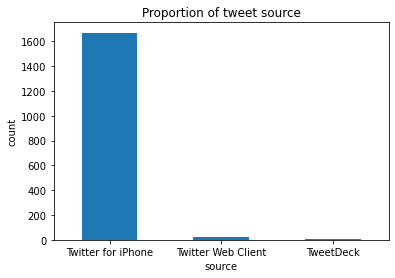

In [83]:
#Visualising the tweet source with the most tweets
tweet_source.plot.bar(x = tweet_source.index, y = tweet_source)
plt.title('Proportion of tweet source')
plt.xlabel('source')
plt.ylabel('count')
plt.xticks(rotation = 0)

#### Observation
Most of the dog rating tweets were made from an iPhone device

#### 2. Distribution of rating numerator

Text(0.5, 1.0, 'Distribution of Dog rating')

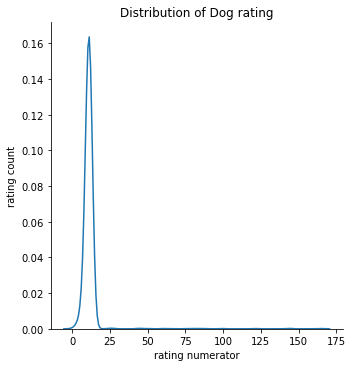

In [84]:
sb.displot(dog_archive_final, x= "rating_numerator", kind="kde")
plt.xlabel('rating numerator')
plt.ylabel('rating count')
plt.title('Distribution of Dog rating')

<Figure size 144x432 with 0 Axes>

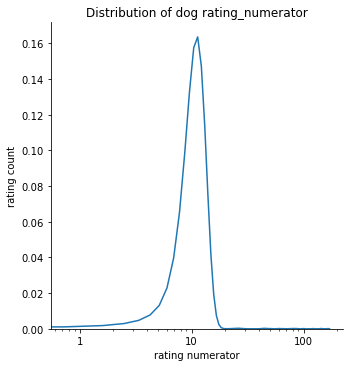

In [85]:
# Using the log transform 
plt.figure(figsize = (2,6))
xticks = [1, 10, 100]
ylabels = ['{}'.format(v) for v in xticks]
sb.displot(dog_archive_final, x= "rating_numerator", kind="kde")
plt.xlabel('rating numerator')
plt.ylabel('rating count')
plt.title('Distribution of dog rating_numerator')
plt.xscale('log')
plt.xticks(xticks,ylabels)
plt.show()

##### Observation
Majority of the numerator dog rating number fell between 0 and 20

In [86]:
dog_archive_final['rating_numerator'].describe()

count    1702.000000
mean       11.458872
std         8.066691
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64

#### 3. Dog breed with the largest number of retweet count, favorite count, and rating


In [87]:
dog_type = dog_archive_final.dog_type.value_counts()
dog_type

pupper     169
doggo       55
puppo       20
floofer      6
Name: dog_type, dtype: int64

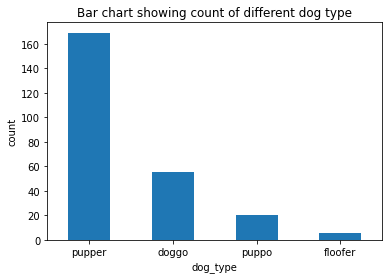

In [88]:
#Visualising the dog type using a bar chart
dog_type.plot.bar(x = dog_type.index, y = dog_type)
plt.title('Bar chart showing count of different dog type')
plt.xlabel('dog_type')
plt.ylabel('count')
plt.xticks(rotation = 0);

#### Observation
However majority of the data for the dog type was unavailable, the Pupper dog type had the most counts in the data set

#### 4. Time series of the volume of tweet rating accross the years

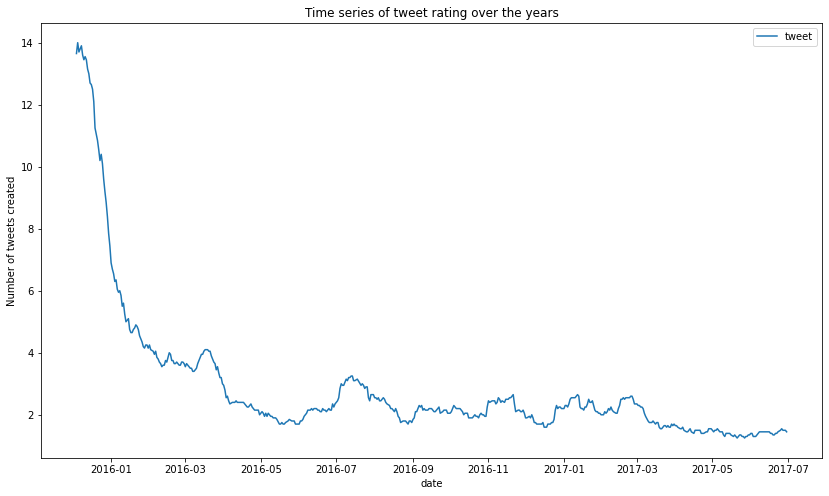

In [89]:
dog_archive_final['date'] = dog_archive_final['timestamp'].dt.date
dog_archive_final['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
time_series_df = dog_archive_final[['date', 'tweet']].groupby(['date']).count()

# Use moving averages to smooth the line
time_series_df['tweet'] = time_series_df['tweet'].rolling(window=20).mean()


#Plot a timeseries
time_series_df.plot(figsize = (14,8))
plt.title('Time series of tweet rating over the years')
plt.ylabel('Number of tweets created')
plt.show()

#### Observation 
Most of the dog rating tweets were made around early 2016